#Punto 4 Taller 5

##Maria Camila Remolina Gutierrez

Considere un atomo de Hidrogeno ionizado en la parte alta de la atmosfera terrestre. Considerando que esa
parte de la atmosfera la intensidad de la luz solar es aproximadamente 1300 W/m2 y que la luz que llega
esta linealmente polarizada escriba un programa (en C, Python o Java) que describa la trayectoria de este
atomo de Hidrogeno ionizado cuando interactua con la luz solar. Haga explıcitas todas las aproximaciones
que utilice para resolver el problema.

In [1]:
%pylab inline
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


In [73]:
#Datos: (Todo en SI)

S = 1300
mu_0 = 4*pi*10**(-7)
c = 3*10**8
q = -1.6021766*10**(-19)
m = 1.6728*10**(-27)

Como esta linealmente polarizada, sabemos que $B=\frac{E}{c}$ entonces de la intensidad podemos sacar $E_0$:

$\vec{S}=\frac{1}{\mu_0}(\vec{E}_0\times \vec{B})$  $\Rightarrow$  $|S|=\frac{1}{\mu_0c}|\vec{E}_0|^2$.

Para la expresion del campo tenemos:

$\vec{E} = E_0 cos(\vec{k}\dot{}\vec{z}-wt)\hat{i}$

Pero al atomo no le llega solo una frecuencia, por lo que uno querría integrar en todas las w's con una distribución que este acorde al espectro solar, simulandolo como un cuerpo negro. Pero como ya se da el aproximado de la intensidad solar, lo que se hace es usar la frecuencia para la que se tiene la intensidad maxima en el espectro solar:

$\lambda_{peak}T = 2.898\times 10^{-3} mK$

$w=\frac{1}{2\pi T}\times 2.898\times 10^{-3}$ para una temperatura del sol de: $T=5780K$

Sabemos que $\vec{F}=\frac{d}{dt}(\gamma m\vec{v})$ y $\vec{F}=q(\vec{E}+\vec{v}\times \vec{B})$ sin embargo como se vió en clase no se alcanzan velocidades tan altas por lo que se ignorará el caso relativista para mayor simplicidad

$\Rightarrow$  $\ddot{\vec{r}} = \frac{q}{m}E(\hat{i}+\frac{1}{c}\dot{\vec{r}}\times\hat{j}) =  \frac{q}{m}E_0cos(\frac{w}{c}z-wt)(\hat{i}+\frac{1}{c}\dot{\vec{r}}\times\hat{j})$

Lo que termina convirtiendose en 3 ecuaciones diferenciales, una para cada coordenada:

$\ddot{x} = \frac{q}{m}E_0cos(\frac{w}{c}z-wt)(1+\frac{\dot{z}}{c})$

$\ddot{y} = 0$

$\ddot{z} = \frac{q}{m}E_0cos(\frac{w}{c}z-wt)\frac{\dot{x}}{c}$

Mis condiciones iniciales son: $\dot{\vec{r}}=\vec{r}=\vec{0}$

De lo anterior obtenemos 2 ecuaciones diferenciales acopladas y que $y=C_1 t+C_2$, que utilizando las CI da que: 

$y=0$

Voy a solucionar computacionalmente estas ecuaciones para $x$ y $z$ en un tiempo $t$ entre 0 y $50/w$ s.

Primero voy a volver las ecuaciones a primer orden diciendo que $X = \dot{x}$ y $Z = \dot{z}$ 

$\dot{X} = \frac{q}{m}E_0cos(\frac{w}{c}z-wt)(1+\frac{Z}{c})$

$\dot{Z} = \frac{q}{m}E_0cos(\frac{w}{c}z-wt)\frac{X}{c}$

In [74]:
#Frecuencia

T_sol = 5780
lambda_p = 2.898*10**(-3)/(T_sol)

w=2*pi*c/lambda_p

print w

3.75950425212e+15


In [75]:
#E_0

E_0 = sqrt(mu_0*c*S)

print E_0

700.063178549


In [85]:
#x y z doble punto

def dotX(parz, parZ, part):
    return (q/m)*E_0*cos(w*parz/c-w*part)*(1+parZ/c)
    
def dotZ(parz, parX, part):
    return (q/m)*E_0*cos(w*parz/c-w*part)*(parX/c)

In [86]:
def vectorfield(arreglo_sol, t):
    
    x = arreglo_sol[0]
    X = arreglo_sol[1]
    z = arreglo_sol[2]
    Z = arreglo_sol[3]
    
    return array([X, dotX(z, Z, t), Z, dotZ(z, X, t)])

In [87]:
#Arreglos para guardar las posiciones

n_points = 1000

ts = linspace(0.0,50.0/w,n_points)

In [88]:
#Condiciones Iniciales

x0 = 0
X0 = 0
z0 = 0
Z0 = 0

solucion_0 = [x0, X0, z0, Z0]

In [89]:
#Solucion al sistema

solucion = odeint(vectorfield, solucion_0, ts)

In [90]:
print solucion

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -1.44787708e-23  -8.90976698e-07   5.25894259e-38   3.23000094e-21]
 [ -4.13284464e-23  -1.77766605e-06   1.94789598e-37   9.18876917e-21]
 ..., 
 [ -2.98009598e-22   6.33046737e-06   3.50592340e-33   5.22323524e-20]
 [ -2.19539849e-22   5.48812091e-06   3.50633144e-33   3.51771050e-20]
 [ -1.52403075e-22   4.63177767e-06   3.50650991e-33   2.02233434e-20]]


In [97]:
#Graficas
#Los puntos marcan la posicion final del atomo

ejex = solucion[:,0]
ejez = solucion[:,2]

velx = solucion[:,1]
velz = solucion[:,3]

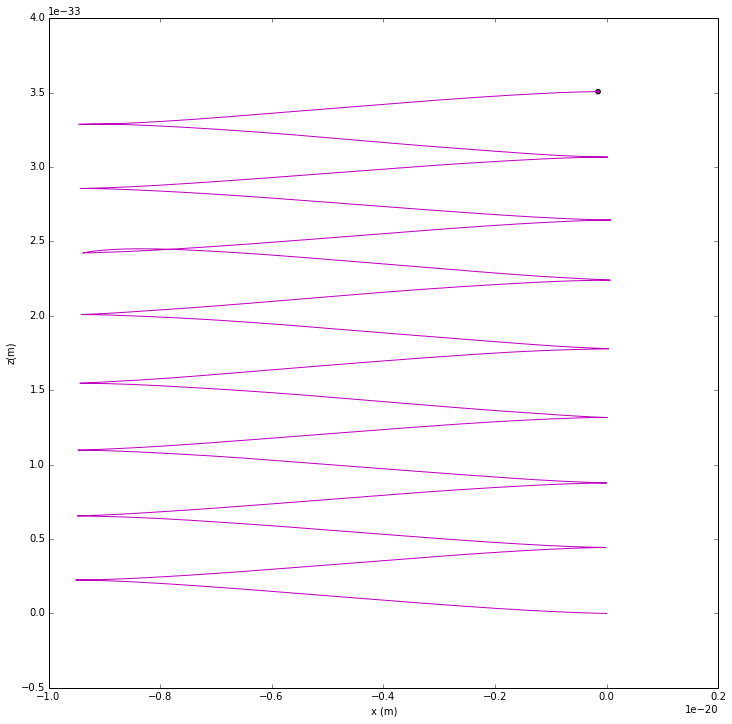

In [94]:
#Trayectoria x-z (no importa y porque es igual a cero)

fig = figure(figsize=(12,12))

plot(ejex, ejez, c='m')
scatter(ejex[-1], ejez[-1], c='m')

xlabel('x (m)')
ylabel('z(m)')
title('Trayectoria x-z')

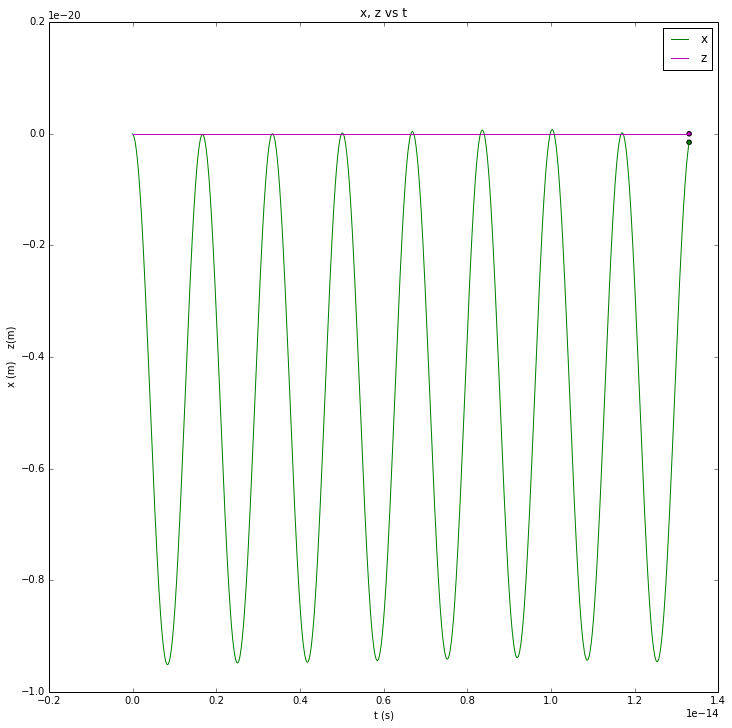

In [95]:
#x vs t   z vs t

fig = figure(figsize=(12,12))

plot(ts, ejex, c='g')
plot(ts, ejez, c='m')
scatter(ts[-1], ejex[-1], c='g')
scatter(ts[-1], ejez[-1], c='m')

xlabel('t (s)')
ylabel('x (m)    z(m)')
title("x, z vs t")

legend(['x','z'])